# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn 

In [2]:
from keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

C:\Users\Rae\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.


In [3]:
X_train.shape

(50000, 32, 32, 3)

# Visualize The Data

[5]


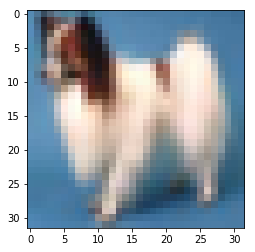

In [4]:
i = 4000
plt.imshow(X_train[i])
print(y_train[i])

C:\Users\Rae\Anaconda3\lib\site-packages\matplotlib\text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


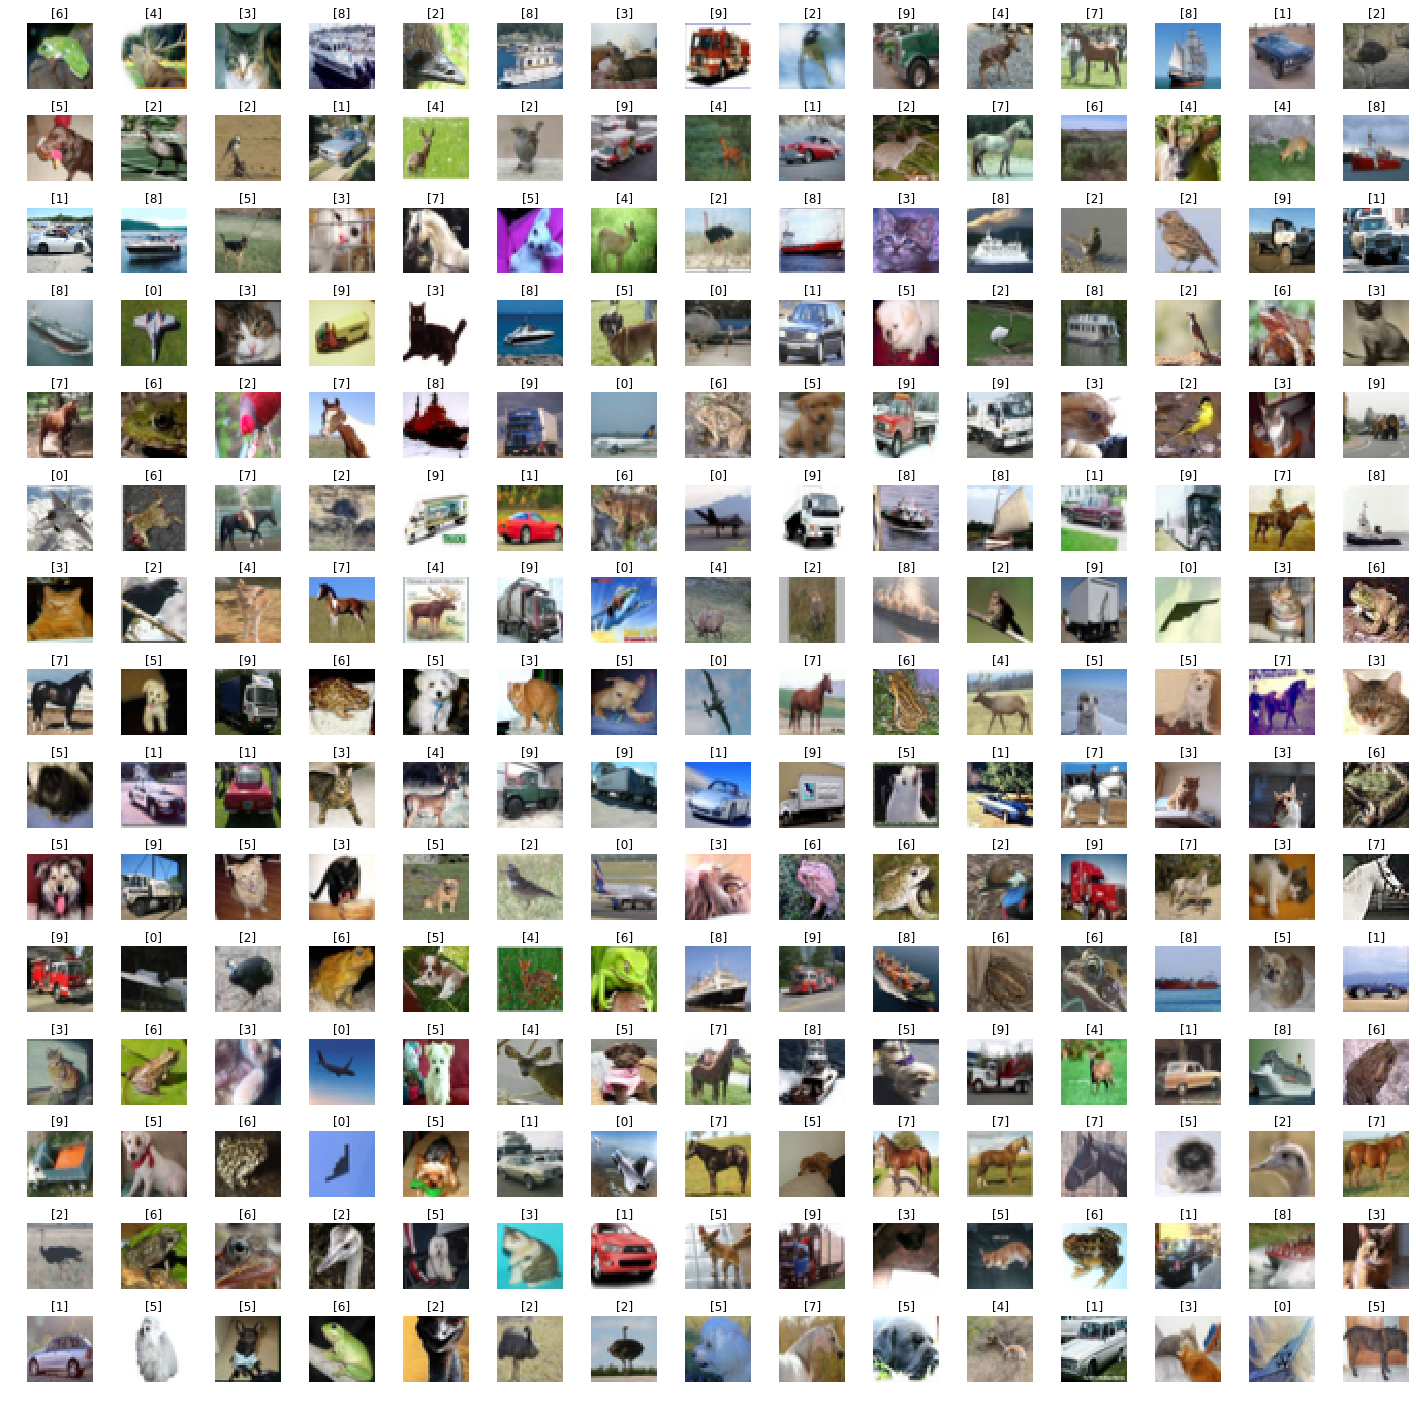

In [5]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25,25))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
plt.subplots_adjust(hspace = 0.4)

# Data Preperation


In [6]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

In [7]:
number_cat = 10

In [8]:
#convert catagories from base ten numbers to binary
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)
y_test = keras.utils.to_categorical(y_test, number_cat)

In [9]:
#normalizing the data
X_train = X_train/255
X_test = X_test/255

In [10]:
Input_shape = X_train.shape[1:]

In [11]:
Input_shape

(32, 32, 3)

# Model Training

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard


In [13]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))


cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 514, activation = 'relu'))

cnn_model.add(Dense(units = 514, activation = 'relu'))

cnn_model.add(Dense(units = 10, activation = 'softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [14]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.rmsprop(lr=0.001), metrics = ['accuracy'])


In [15]:
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs =10,shuffle = True)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
50000/50000 [==============================] - 245s 5ms/step - loss: 1.5957 - acc: 0.4172
Epoch 2/10
50000/50000 [==============================] - 251s 5ms/step - loss: 1.2123 - acc: 0.5721
Epoch 3/10
50000/50000 [==============================] - 250s 5ms/step - loss: 1.1055 - acc: 0.6167
Epoch 4/10
50000/50000 [==============================] - 238s 5ms/step - loss: 1.0510 - acc: 0.6397
Epoch 5/10
50000/50000 [==============================] - 232s 5ms/step - loss: 1.0155 - acc: 0.6543
Epoch 6/10
50000/50000 [==============================] - 244s 5ms/step - loss: 0.9977 - acc: 0.6618
Epoch 7/10
50000/50000 [==============================] - 270s 5ms/step - loss: 0.9843 - acc: 0.6696
Epoch 8/10
50000/50000 [==============================] - 252s 5ms/step - loss: 0.9733 - acc: 0.6727
Epoch 9/10
50000/50000 [==============================] - 260s 5ms/step - loss: 0.9638 - acc: 0.6753
Epoch 10/10
50000/50000 [==================

# Evaluate The Model

In [16]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

10000/10000 [==============================] - 16s 2ms/step
Test Accuracy: 0.7098


In [17]:
predicted_classes = cnn_model.predict_classes(X_test)
predicted_classes

array([3, 8, 8, ..., 5, 0, 7], dtype=int64)

In [18]:
#changing from binary back to decimal values
y_test = y_test.argmax(1)

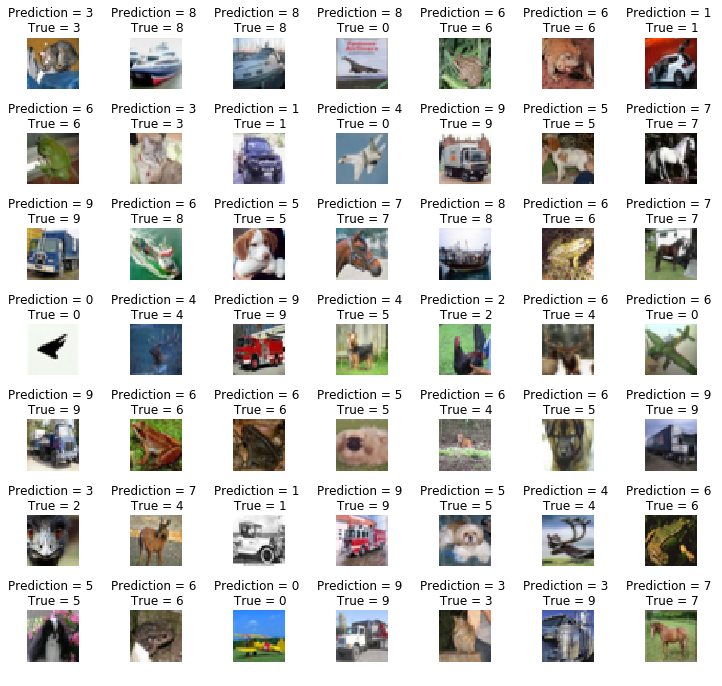

In [25]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {} \n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)                          

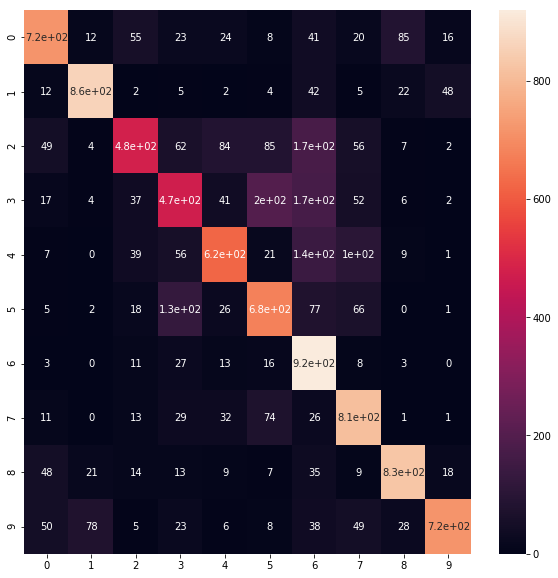

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_classes)
cm
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

# Save The Model

In [29]:
import os
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)

# Data Augmentation

In [ ]:
#import keras
#from keras.datasets import cifar10
#(X_train, y_train, X_test, y_test) = cifar10.load_data()

In [ ]:
#X_train = X_train.astype('float32')
#X_test = X_test.astype('float32')

In [ ]:
#n = 8
#X_train_sample = X_train[:n]

In [ ]:
#X_train_sample.shape

In [ ]:
##data augmentation
#from keras.preprocessing.image import ImageDataGenerator
#datagen_train = ImageDataGenerator(rotation_range = 90)
##datagen_train = ImageDtaGenerator(vertical_flip = True)

#datagen_train.fit(X_train_sample)

In [ ]:
##loop for applying augmentation to data
#from scipy.misc import toimage

#fig = plt.figure(figsize = (20,2))
#for X_batch in datagen_train.flow(X_train_sample, batch_size = n):
#    for i in range(0,n):
#        ax = fig.add_subplot(1, n, i+1)
#        ax.imshow(toimage(X_batch[i]))
#    fig.suptitle('Augmented iamges (rotated 90 degrees)')
#    plt.show()
#   break;

# Model Training Using Augmented Data

In [31]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
                            rotation_range = 90,
                            width_shift_range = 0.1,
                            horizontal_flip = True,
                            vertical_flip = True
)

In [32]:
datagen.fit(X_train)

In [ ]:
cnn_model.fit_generator(datagen.flow(X_train, y_train, batch_size = 32 ), steps_per_epoch = 1500, epochs = 2)

Epoch 1/2
 105/1500 [=>............................] - ETA: 3:32 - loss: 1.8631 - acc: 0.3542

In [ ]:
#score the model
score = cnn_model.evaluate(X_test, y_test)
print('Test accuracy', score[1])

# save the new model
import os
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_augmented_model.h5')
cnn_model.save(model_path)